In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import median_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_percentage_error
import codesModel as codeM


In [2]:
# Opciones de pandas
rows, cols = 50, 50
pd.set_option("display.max.columns", cols)
pd.set_option("display.max.rows", rows)
# Rutas

In [3]:
data = pd.read_csv('testconcat.csv', header=[0,1], index_col=0)
data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m-%d'), inplace=True)
data

Attributes       Close                                                 \
Symbol             BDX         GL         IBM         NSC         PEP   
1985-03-01    1.721667   3.255194   14.186936    2.770183    1.143114   
1985-03-04    1.687380   3.033250   14.095586    2.754384    1.141212   
1985-03-05    1.655797   3.107232   14.095586    2.738583    1.164987   
1985-03-06    1.642262   3.088737   13.873695    2.759651    1.147157   
1985-03-07    1.637751   3.033250   13.586567    2.822849    1.144183   
...                ...        ...         ...         ...         ...   
2020-12-23  244.250000  92.720818  122.266174  232.182770  144.410004   
2020-12-24  247.990005  92.690872  123.045761  233.447678  145.059998   
2020-12-28  248.149994  93.110062  123.174042  235.758347  146.910004   
2020-12-29  248.350006  91.982246  122.167496  233.049286  147.419998   
2020-12-30  246.679993  93.030212  122.700371  235.031281  147.309998   

Attributes   CloseNext                                                 \
Symbol             BDX         GL         IBM         NSC         PEP   
1985-03-01    1.687380   3.033250   14.095586    2.754384    1.141212   
1985-03-04    1.655797   3.107232   14.095586    2.738583    1.164987   
1985-03-05    1.642262   3.088737   13.873695    2.759651    1.147157   
1985-03-06    1.637751   3.033250   13.586567    2.822849    1.144183   
1985-03-07    1.619704   3.005508   13.534367    2.775449    1.141212   
...                ...        ...         ...         ...         ...   
2020-12-23  247.990005  92.690872  123.045761  233.447678  145.059998   
2020-12-24  248.149994  93.110062  123.174042  235.758347  146.910004   
2020-12-28  248.350006  91.982246  122.167496  233.049286  147.419998   
2020-12-29  246.679993  93.030212  122.700371  235.031281  147.309998   
2020-12-30         NaN        NaN         NaN         NaN         NaN   

Attributes        High                                                 \
Symbol             BDX         GL         IBM         NSC         PEP   
1985-03-01    1.721667   3.292185   14.278297    2.785982    1.154899   
1985-03-04    1.718962   3.273691   14.239152    2.785983    1.153099   
1985-03-05    1.687378   3.125728   14.186946    2.754383    1.170931   
1985-03-06    1.673845   3.107232   14.147776    2.775450    1.167960   
1985-03-07    1.642263   3.088737   13.925905    2.822849    1.153099   
...                ...        ...         ...         ...         ...   
2020-12-23  247.229996  93.449405  123.558897  233.258430  145.600006   
2020-12-24  249.250000  93.379536  123.450351  233.995469  145.110001   
2020-12-28  249.869995  94.477422  124.930568  237.511265  147.600006   
2020-12-29  250.750000  93.589134  123.825342  237.411666  148.770004   
2020-12-30  249.339996  93.658994  123.203648  235.987428  147.990005   

Attributes         Low                                                 \
Symbol             BDX         GL         IBM         NSC         PEP   
1985-03-01    1.676832   3.236698   13.991164    2.743850    1.125437   
1985-03-04    1.678356   2.996260   14.030328    2.743851    1.135268   
1985-03-05    1.651285   3.051746   14.056431    2.717518    1.141212   
1985-03-06    1.642262   3.051746   13.860644    2.717519    1.144184   
1985-03-07    1.624216   3.033250   13.573515    2.759651    1.132296   
...                ...        ...         ...         ...         ...   
2020-12-23  244.179993  91.932340  122.108281  229.573308  144.070007   
2020-12-24  244.899994  91.702776  122.572087  230.698779  144.139999   
2020-12-28  247.289993  92.750755  122.818788  234.244453  145.539993   
2020-12-29  247.279999  91.902399  121.614875  231.515469  146.839996   
2020-12-30  246.589996  92.471295  121.999734  233.059245  147.009995   

Attributes        Open                                                 ...  \
Symbol             BDX         GL         IBM         NSC         PEP  ...   
1985-03-01    1.676832   0.000000   14.04337

In [24]:
#Cuál es el número de registros?
#Cuál es el número de atributos?
shape = data.shape
shape

(9033, 80)

In [25]:
stocks_list = data.xs('Close', level=0, axis=1).columns
for i in stocks_list:
    print("stock",i)
    # Cual es el máximo de datos faltantes en un mismo registro?
    print(max(data.xs(i, level=1, axis=1).isnull().sum(axis=1)))
    #Cuantos datos faltantes hay por cada atributo?
    print(data.xs(i, level=1, axis=1).isnull().sum())

stock BDX
5
Attributes
Close         0
CloseNext     1
High          0
Low           0
Open          0
Volume        0
bop           0
ema20         0
ema200        0
lower        19
ma20         19
macd          0
momentum      1
signal        0
std20d       19
upper        19
dtype: int64
stock GL
5
Attributes
Close         0
CloseNext     1
High          0
Low           0
Open          0
Volume        0
bop           3
ema20         0
ema200        0
lower        19
ma20         19
macd          0
momentum      1
signal        0
std20d       19
upper        19
dtype: int64
stock IBM
5
Attributes
Close         0
CloseNext     1
High          0
Low           0
Open          0
Volume        0
bop           0
ema20         0
ema200        0
lower        19
ma20         19
macd          0
momentum      1
signal        0
std20d       19
upper        19
dtype: int64
stock NSC
5
Attributes
Close         0
CloseNext     1
High          0
Low           0
Open          0
Volume        0
bop   

## limpieza

En el primer box realizo una limpieza teniendo todas las acciones para que sea mas facil, ya que estas fechas en todas las acciones estan vacias por lo tanto se eliminan.

En el segundo box se borran estas acciones las cuales tienen muchos datos vacios

En el tercer box se hace uso de ffill 'forward fill' and will propagate last valid observation forward. inplace : If True, fill in place.

In [26]:
#se borran estas fechas las cuales estan vacias en todas las acciones
date_drops = ['2020-12-31','2020-12-30']
data.drop(date_drops, axis=0, errors='ignore', inplace=True)
data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m-%d'), inplace=True)

In [27]:
#borrar desde 1980
data.drop(data.index[:data.index.get_loc('1985-03-05')], axis=0, inplace=True)

In [28]:
# missing values in the data are interpolated using forward-fill (‘ffill ()’)method to propagate last valid observation forward.
data = data.fillna(method='bfill')

In [29]:
#se borran estos datos debido a la alta correlacion
attributes_to_erase = ('High','Low','Open','ma20','lower','upper','ema20')
for i in attributes_to_erase:
    data=data.drop(i, axis=1, level=0)

In [30]:
data.to_csv('data_technical_clean.csv')

## algunos analisis individuales

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.xs('NSC', level=1, axis=1).corr(), square=True, annot=True, ax=ax)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.xs('GL', level=1, axis=1).corr(), square=True, annot=True, ax=ax)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.xs('PEP', level=1, axis=1).corr(), square=True, annot=True, ax=ax)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.xs('BDX', level=1, axis=1).corr(), square=True, annot=True, ax=ax)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.xs('IBM', level=1, axis=1).corr(), square=True, annot=True, ax=ax)

## Modelo base

In [ ]:
dataNSC = data.xs('NSC', level=1, axis=1)
dataNSC

In [ ]:
r2Score = r2_score(dataNSC['CloseNext'],dataNSC['Close'])
rmse = mean_squared_error(dataNSC['CloseNext'],dataNSC['Close'], squared=False)
mae=median_absolute_error(dataNSC['CloseNext'],dataNSC['Close'])
print("r2Score:",r2Score)
print("rmse:",rmse)
print("mae:",mae)

## 1) Modelo donde escalamos solo las variables independientes

In [10]:
X = data.drop(['CloseNext'], level=0, axis=1)
y = data['CloseNext']

In [11]:
def dfM(stockName, X):
    scaler = StandardScaler()
    Xsc = scaler.fit_transform(X.xs(stockName, level=1, axis=1))
    df = pd.DataFrame(data = Xsc, columns = X.xs(stockName, level=1, axis=1).columns, index=X.xs(stockName, level=1, axis=1).index)
    df['CloseNext'] = y[stockName].values
    return df

In [12]:
stock_sel = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
data_scaler = pd.DataFrame()
for stock in stock_sel:
    df2 = dfM(stock, X) 
    df2.columns = pd.MultiIndex.from_product([df2.columns, [stock]], names=['Attributes', 'Symbol'])
    data_scaler = pd.concat([data_scaler, df2], axis=1).sort_index(axis=1)

data_scaler

Attributes     Close                                           CloseNext  \
Symbol           BDX        GL       IBM       NSC       PEP         BDX   
1985-03-05 -0.827281 -0.839889 -1.073245 -0.796551 -1.079229    1.642262   
1985-03-06 -0.827475 -0.840615 -1.077965 -0.796121 -1.079732    1.637751   
1985-03-07 -0.827539 -0.842794 -1.084072 -0.794829 -1.079816    1.619704   
1985-03-08 -0.827797 -0.843884 -1.085183 -0.795798 -1.079899    1.588121   
1985-03-11 -0.828249 -0.844974 -1.081018 -0.796013 -1.079816    1.606167   
...              ...       ...       ...       ...       ...         ...   
2020-12-22  2.666565  2.634794  1.221644  3.839015  2.945634  244.250000   
2020-12-23  2.642963  2.679876  1.227731  3.892342  2.956622  247.990005   
2020-12-24  2.696462  2.678700  1.244314  3.918191  2.974935  248.149994   
2020-12-28  2.698751  2.695165  1.247043  3.965412  3.027058  248.350006   
2020-12-29  2.701612  2.650867  1.225632  3.910050  3.041427  246.679993   

Attributes                                                   Volume            \
Symbol             GL         IBM         NSC         PEP       BDX        GL   
1985-03-05   3.088737   13.873695    2.759651    1.147157 -0.719720 -0.594723   
1985-03-06   3.033250   13.586567    2.822849    1.144183 -0.242853 -0.508574   
1985-03-07   3.005508   13.534367    2.775449    1.141212  0.423002 -0.960252   
1985-03-08   2.977763   13.730146    2.764918    1.144183 -0.154951 -0.962667   
1985-03-11   3.060992   13.769285    2.764918    1.159043 -0.559299 -0.271866   
...               ...         ...         ...         ...       ...       ...   
2020-12-22  92.720818  122.266174  232.182770  144.410004 -0.218268 -0.511705   
2020-12-23  92.690872  123.045761  233.447678  145.059998 -0.247935 -0.384435   
2020-12-24  93.110062  123.174042  235.758347  146.910004 -0.906511 -0.954825   
2020-12-28  91.982246  122.167496  233.049286  147.419998 -0.625637 -0.633488   
2020-12-29  93.030212  122.700371  235.031281  147.309998 -0.388715 -0.431550   

Attributes                                     bop                      \
Symbol           IBM       NSC       PEP       BDX        GL       IBM   
1985-03-05 -0.696469 -0.370145  0.178135 -1.156526  2.141280 -0.582557   
1985-03-06 -0.678160  0.101955 -0.369045 -1.572225  2.916646 -1.541034   
1985-03-07 -0.012646 -0.629145 -0.024218 -0.484997  2.859899 -1.260778   
1985-03-08 -0.043771  1.017961 -0.735208 -1.231152  4.368079 -0.890839   
1985-03-11 -0.658936 -0.507841 -1.177081 -1.380377  1.585294  1.475225   
...              ...       ...       ...       ...       ...       ...   
2020-12-22 -0.628705 -0.603063 -0.777690 -0.869343 -0.261843  0.278933   
2020-12-23 -1.004532 -0.309457 -0.780978 -1.698887 -0.212034 -0.002479   
2020-12-24 -1.218010 -0.911313 -1.454648  1.234673 -0.256042 -0.671920   
2020-12-28 -0.793687 -0.618435 -0.838946 -0.488501 -0.246440 -0.269665   
2020-12-29 -0.823026 -0.512941 -0.573883 -0.584364 -0.293890 -1.307564   

Attributes                        ema200                                \
Symbol           NSC       PEP       BDX        GL       IBM       NSC   
1985-03-05 -0.299008  1.250722 -0.821408 -0.829413 -1.058602 -0.809074   
1985-03-06  0.633997 -1.535893 -0.821420 -0.829480 -1.058669 -0.809076   
1985-03-07  1.806196  0.179964 -0.821432 -0.829568 -1.058797 -0.809065   
1985-03-08 -1.647641 -0.863304 -0.821447 -0.829666 -1.058934 -0.809063   
1985-03-11 -0.496361 -0.735243 -0.821466 -0.829774 -1.059028 -0.809065   
...              ...       ...       ...       ...       ...       ...   
2020-12-22  0.420046 -0.827889  2.769609  2.516586  1.205041  3.636466   
2020-12-23  0.561569 -0.195053  2.769846  2.519608  1.205655  3.642539   
2020-12-24  0.615266  0.361117  2.770635  2.522587  1.206430  3.648830   
2020-12-28  0.239337  0.959637  2.771440  2.525708  1.207224  3.655565   
2020-12-29 -0.950645 -0.353455  2.772266  2.528339  1.207795  3.661638   

Attributes                macd 

In [13]:
data.to_csv('data_technical_clean.csv')

In [14]:
data_clean = pd.read_csv('data_technical_clean.csv', header=[0,1], index_col=0)
stocks = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
df_stocks = pd.DataFrame()
for stock in stocks:
    data = data_clean.xs(stock, level=1, axis=1)
    window_size = 7
    df = pd.DataFrame()
    for i in range(0, data.shape[0]-window_size):
        row = []
        for j in range(i, i+window_size):
            for n in data.drop(['CloseNext'], axis=1).iloc[j].values:
                row.append(n)
        row.append(data.iloc[i+window_size]['CloseNext'])
        df = df.append(pd.Series(row), ignore_index=True)
    df.rename(columns={df.columns[-1]:'CloseNext'}, inplace=True)    
    df.index = data.index[window_size:]
    columns = pd.MultiIndex.from_product([df.columns, [stock]], names=['Attributes', 'Symbol'])
    df.columns=columns
    df_stocks = pd.concat([df_stocks, df], axis=1).sort_index(axis=1)
    
    
    
df_stocks.to_csv('datawindow.csv')

## Trabajo con la accion NSC usando standarizacion

In [ ]:
dataNSC_scaler = data_scaler.xs('NSC', level=1, axis=1)
dataNSC_scaler

In [ ]:
# Realizamos el holdout
#HOLDOUT = 5
#for i in range(HOLDOUT):
model = RandomForestRegressor(bootstrap=True, n_jobs=-1,)
parameter_space = {
    'n_estimators': [80, 100, 150],
    'min_samples_leaf': [1, 3],
    'max_features': ['auto', 0.5],
    'oob_score': [True],
    'max_leaf_nodes' :[None],
    'max_samples':[None,100]

}
i=1
codeM.gridSearch(model,dataNSC_scaler, parameter_space,0.3,8,i)

## CrossValidation

In [ ]:
Params = {'max_features': 0.5, 'max_leaf_nodes': None, 'max_samples': None, 'min_samples_leaf': 1, 'n_estimators': 80, 'oob_score': True, 'rs':[0,2,3]}
clf = RandomForestRegressor(max_features= Params['max_features'], max_leaf_nodes= Params['max_leaf_nodes'], max_samples= Params['max_samples'], min_samples_leaf= Params['min_samples_leaf'], n_estimators=Params['n_estimators'], oob_score= Params['oob_score'])
codeM.crossValidation(clf, Params, dataNSC_scaler)

## Prediccion de todas las acciones, escalandolas

In [ ]:
Params = {'max_features': 0.5, 'max_leaf_nodes': None, 'max_samples': None, 'min_samples_leaf': 1, 'n_estimators': 80, 'oob_score': True, 'rs':[0,2,3]}

clf = RandomForestRegressor(max_features= Params['max_features'], max_leaf_nodes= Params['max_leaf_nodes'], max_samples= Params['max_samples'], min_samples_leaf= Params['min_samples_leaf'], n_estimators=Params['n_estimators'], oob_score= Params['oob_score'])
codeM.allStock(data_scaler, clf, 8)


## Separamos los datos manualmente

In [ ]:
dataNSC_train_scaler = dataNSC_scaler.drop(dataNSC_scaler.index[dataNSC_scaler.index.get_loc('2019-01-03'):], axis=0)
dataNSC_test_scaler = dataNSC_scaler.drop(dataNSC_scaler.index[:dataNSC_scaler.index.get_loc('2019-01-03')], axis=0)
dataNSC_train_scaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataNSC_train_scaler.drop(['CloseNext'], axis=1), dataNSC_train_scaler['CloseNext'], test_size=0.3)
clf2 = RandomForestRegressor(max_features= None, max_leaf_nodes= None, max_samples= None, min_samples_leaf= 1,n_estimators=100,  oob_score= True)
clf2.fit(X_train,y_train)

In [ ]:
pred2=clf2.predict(dataNSC_test_scaler.drop(['CloseNext'], axis=1))
y_test_data2 = np.array(dataNSC_test_scaler['CloseNext'])
r2Score = r2_score(y_test_data2, pred2)
rmse = mean_squared_error(y_test_data2, pred2, squared=False)
mae=median_absolute_error(y_test_data2, pred2)
evs=explained_variance_score(y_test_data2, pred2)
mape=mean_absolute_percentage_error(y_test_data2, pred2)
p=8
n=len(y_test_data2)
Adj_r2 = 1-(1-r2Score)*(n-1)/(n-p-1)
print("mape:",mape)
print("Adj_r2Score:",Adj_r2)
print("r2Score:",r2Score)
print("rmse:",rmse)
print("mae:",mae)
print("evs:",evs)

In [ ]:
X_train=dataNSC_train_scaler.drop(['CloseNext'],axis=1)
X_test=dataNSC_test_scaler.drop(['CloseNext'],axis=1)
y_test=dataNSC_test_scaler['CloseNext']
date='2017-12-22'
codeM.manuallySplitDataPrediction(clf2, dataNSC_scaler,dataNSC_train_scaler, dataNSC_test_scaler, X_train,X_test, y_test,8,date)


## 2) Modelo donde escalamos las variables independientes y la dependiente

## gridsearch

In [ ]:
# Realizamos el holdout
#HOLDOUT = 5
sc_predict = StandardScaler()
stock=dataNSC_scaler
y_data = sc_predict.fit_transform(stock.values[:, stock.columns.get_loc('CloseNext'):stock.columns.get_loc('CloseNext')+1])    
#for i in range(HOLDOUT):
model = RandomForestRegressor(bootstrap=True, n_jobs=-1,)
parameter_space = {
    'n_estimators': [80, 100, 150],
    'min_samples_leaf': [1, 3],
    'max_features': ['auto', 0.5],
    'oob_score': [True],
    'max_leaf_nodes' :[None],
    'max_samples':[None,100]

}
i=1
codeM.gridSearch(model,stock, parameter_space,0.3,8,i, isScaled=True, sc_predict=sc_predict, y=y_data)

## Se quiere separar un conjunto para pruebas y uno para test manualmente

In [ ]:
dataNSC_train = dataNSC.drop(dataNSC.index[dataNSC.index.get_loc('2019-01-03'):], axis=0)
dataNSC_test = dataNSC.drop(dataNSC.index[:dataNSC.index.get_loc('2019-01-03')], axis=0)
dataNSC_train

## Estandarizamos los dos dataframes

In [ ]:
X = np.array(dataNSC_train.drop(['CloseNext'], axis=1))
sc = StandardScaler()
X_scaled_train = sc.fit_transform(X)
sc_predict = StandardScaler()
y_scaled_train = sc_predict.fit_transform(dataNSC_train.values[:, dataNSC_train.columns.get_loc('CloseNext'):dataNSC_train.columns.get_loc('CloseNext')+1])

In [ ]:
X = np.array(dataNSC_test.drop(['CloseNext'], axis=1))
sc2 = StandardScaler()
X_scaled_test = sc2.fit_transform(X)
sc2_predict = StandardScaler()
y_scaled_test = sc2_predict.fit_transform(dataNSC_test.values[:, dataNSC_test.columns.get_loc('CloseNext'):dataNSC_test.columns.get_loc('CloseNext')+1])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_train, y_scaled_train, shuffle=True, test_size=0.2, random_state=15)
y_train = y_train.ravel()
y_test = y_test.ravel()
clf2 = RandomForestRegressor(max_features= 0.5, max_leaf_nodes= None, max_samples= None, min_samples_leaf= 1,n_estimators=100,  oob_score= True)
clf2.fit(X_train,y_train)
# Se hace la prediccion sobre los datos de prueba
pred = clf2.predict(X_test)
r2Score = r2_score(y_test,pred)
rmse = mean_squared_error(y_test,pred, squared=False)
mae=median_absolute_error(y_test,pred)
evs=explained_variance_score(y_test, pred)

print("r2Score:",r2Score)
print("rmse:",rmse)
print("mae:",mae)
#best possible value = 1
print("evs:",evs)
print("random_seeds",i)



In [ ]:
pred = clf2.predict(X_scaled_test)
r2Score = r2_score(y_scaled_test,pred)
rmse = mean_squared_error(y_scaled_test,pred, squared=False)
mae=median_absolute_error(y_scaled_test,pred)
evs=explained_variance_score(y_scaled_test, pred)

print("r2Score:",r2Score)
print("rmse:",rmse)
print("mae:",mae)
print("evs:",evs)

## Graficaremos la prediccion usando un conjunto de entrenamiento y otro de pruebas

In [ ]:
date='2017-12-22'
codeM.manuallySplitDataPrediction(clf2, dataNSC,dataNSC_train, dataNSC_test, X_scaled_train,X_scaled_test, y_scaled_test,8,date,isScaled=True, sc=sc_predict,sc2=sc2_predict )


## Escalamos todo el dataframe

In [ ]:
Params = {'max_features': 0.5, 'max_leaf_nodes': None, 'max_samples': None, 'min_samples_leaf': 1, 'n_estimators': 80, 'oob_score': True, 'rs':[0,2,3]}
clf = RandomForestRegressor(max_features= Params['max_features'], max_leaf_nodes= Params['max_leaf_nodes'], max_samples= Params['max_samples'], min_samples_leaf= Params['min_samples_leaf'], n_estimators=Params['n_estimators'], oob_score= Params['oob_score'])
codeM.allStock(data, clf, 8, isScaled=True)

## window

In [15]:
data_scaler_window = pd.read_csv('datawindow.csv', header=[0,1], index_col=0)
data_scaler_window.set_index(pd.DatetimeIndex(list(data_scaler_window.index)).strftime('%Y-%m-%d'), inplace=True)
data_scaler_window

Attributes           0                                                 \
Symbol             BDX         GL         IBM         NSC         PEP   
1985-03-14    1.655797   3.107232   14.095586    2.738583    1.164987   
1985-03-15    1.642262   3.088737   13.873695    2.759651    1.147157   
1985-03-18    1.637751   3.033250   13.586567    2.822849    1.144183   
1985-03-19    1.619704   3.005508   13.534367    2.775449    1.141212   
1985-03-20    1.588121   2.977763   13.730146    2.764918    1.144183   
...                ...        ...         ...         ...         ...   
2020-12-22  242.690002  93.519264  122.631294  234.304214  144.970001   
2020-12-23  240.000000  91.592987  121.901054  228.328339  144.229996   
2020-12-24  244.130005  93.529251  124.269409  228.876129  144.770004   
2020-12-28  245.289993  93.349594  123.894424  227.780548  144.889999   
2020-12-29  248.699997  93.249794  123.894424  229.762558  145.710007   

Attributes          1                                                    2  \
Symbol            BDX        GL        IBM        NSC        PEP       BDX   
1985-03-14   576000.0  378000.0  4040000.0  1125900.0  5153400.0 -0.624992   
1985-03-15   923200.0  450225.0  4120000.0  1773900.0  3722400.0 -0.857135   
1985-03-18  1408000.0   71550.0  7028000.0   770400.0  4624200.0 -0.249985   
1985-03-19   987200.0   69525.0  6892000.0  3031200.0  2764800.0 -0.666667   
1985-03-20   692800.0  648675.0  4204000.0   936900.0  1609200.0 -0.750000   
...               ...       ...        ...        ...        ...       ...   
2020-12-22  1274000.0  332200.0  4481400.0  1161200.0  2975500.0  0.498271   
2020-12-23  1236600.0  426600.0  5050000.0  2004900.0  3952400.0 -0.504374   
2020-12-24  1261700.0  411600.0  4359600.0  1210400.0  3183800.0  0.641740   
2020-12-28  1210700.0  315600.0  4530100.0  1081800.0  4915800.0  0.070539   
2020-12-29  1172500.0  337900.0  3788000.0  1097100.0  3312500.0  0.621545   

Attributes                                                    3             \
Symbol             GL       IBM       NSC       PEP         BDX         GL   
1985-03-14  42.000023 -0.300000 -0.142862  0.700006    1.720674   3.251535   
1985-03-15  55.666877 -0.818182  0.363643 -0.749982    1.719894   3.249915   
1985-03-18  54.666638 -0.666667  1.000000  0.142847    1.719077   3.247759   
1985-03-19  81.250315 -0.466667 -0.875001 -0.400007    1.718088   3.245349   
1985-03-20  32.200041  0.812500 -0.250000 -0.333371    1.716795   3.242686   
...               ...       ...       ...       ...         ...        ...   
2020-12-22  -0.041916  0.099997  0.122034  0.792896  242.387914  84.747340   
2020-12-23  -1.000000 -0.646210 -0.949631 -0.421490  242.364154  84.815455   
2020-12-24   0.488766  0.618475 -0.299998  0.152178  242.381724  84.902160   
2020-12-28  -0.379745 -0.296873 -0.369729  0.579617  242.410662  84.986214   
2020-12-29  -0.129997 -0.449154  0.188745  0.450985  242.473243  85.068439   

Attributes                                             4                      \
Symbol             IBM         NSC         PEP       BDX        GL       IBM   
1985-03-14   14.185128    2.769713    1.143313 -0.007366 -0.025473 -0.012914   
1985-03-15   14.182029    2.769613    1.143351 -0.011991 -0.032744 -0.034875   
1985-03-18   14.176104    2.770142    1.143359 -0.015837 -0.042494 -0.074589   
1985-03-19   14.169718    2.770195    1.143338 -0.020109 -0.051861 -0.109018   
1985-03-20   14.165344    2.770143    1.143346 -0.025747 -0.060823 -0.119132   
...                ...         ...         ...       ...       ...       ...   
2020-12-22  119.129244  202.686896  135.104759  1.462677  1.799938  2.289730   
2020-12-23  119.156825  202.942035  135.195557  1.466273  1.456414  2.078649   
2020-12-24  119.207696  203.200086  135.290825  1.781840  1.325134  2.078513   
2020-12-28  119.254330  203.444668  135.386339  2.101308  1.192846  2.024806   
2020-12-29  119.300500  203.706537  135.489062  2.599680  1.

In [16]:
dataNSC_scaler = data_scaler_window.xs('NSC', level=1, axis=1)
dataNSC_scaler

Attributes,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,CloseNext
1985-03-14,2.738583,1125900.0,-0.142862,2.769713,-0.003494,-0.015801,-0.000900,0.045925,2.759651,1773900.0,0.363643,2.769613,-0.003523,0.021068,-0.001425,0.045925,2.822849,770400.0,1.000000,2.770142,0.001535,0.063198,-0.000833,0.045925,2.775449,...,2.764918,936900.0,-0.250000,2.770143,0.000969,-0.010531,-0.000067,0.045925,2.764918,1608300.0,-0.333337,2.770091,0.000386,0.000000,0.000023,0.045925,2.749118,586800.0,-0.142856,2.769882,-0.001336,-0.015800,-0.000249,0.045925,2.717519
1985-03-15,2.759651,1773900.0,0.363643,2.769613,-0.003523,0.021068,-0.001425,0.045925,2.822849,770400.0,1.000000,2.770142,0.001535,0.063198,-0.000833,0.045925,2.775449,3031200.0,-0.875001,2.770195,0.001700,-0.047400,-0.000326,0.045925,2.764918,...,2.764918,1608300.0,-0.333337,2.770091,0.000386,0.000000,0.000023,0.045925,2.749118,586800.0,-0.142856,2.769882,-0.001336,-0.015800,-0.000249,0.045925,2.738583,520200.0,-0.400007,2.769571,-0.003510,-0.010535,-0.000901,0.045925,2.696452
1985-03-18,2.822849,770400.0,1.000000,2.770142,0.001535,0.063198,-0.000833,0.045925,2.775449,3031200.0,-0.875001,2.770195,0.001700,-0.047400,-0.000326,0.045925,2.764918,936900.0,-0.250000,2.770143,0.000969,-0.010531,-0.000067,0.045925,2.764918,...,2.749118,586800.0,-0.142856,2.769882,-0.001336,-0.015800,-0.000249,0.045925,2.738583,520200.0,-0.400007,2.769571,-0.003510,-0.010535,-0.000901,0.045925,2.717519,1006200.0,-0.799999,2.769053,-0.006854,-0.021064,-0.002092,0.045925,2.706985
1985-03-19,2.775449,3031200.0,-0.875001,2.770195,0.001700,-0.047400,-0.000326,0.045925,2.764918,936900.0,-0.250000,2.770143,0.000969,-0.010531,-0.000067,0.045925,2.764918,1608300.0,-0.333337,2.770091,0.000386,0.000000,0.000023,0.045925,2.749118,...,2.738583,520200.0,-0.400007,2.769571,-0.003510,-0.010535,-0.000901,0.045925,2.717519,1006200.0,-0.799999,2.769053,-0.006854,-0.021064,-0.002092,0.045925,2.696452,902700.0,-0.500000,2.768330,-0.011076,-0.021067,-0.003889,0.045925,2.685919
1985-03-20,2.764918,936900.0,-0.250000,2.770143,0.000969,-0.010531,-0.000067,0.045925,2.764918,1608300.0,-0.333337,2.770091,0.000386,0.000000,0.000023,0.045925,2.749118,586800.0,-0.142856,2.769882,-0.001336,-0.015800,-0.000249,0.045925,2.738583,...,2.717519,1006200.0,-0.799999,2.769053,-0.006854,-0.021064,-0.002092,0.045925,2.696452,902700.0,-0.500000,2.768330,-0.011076,-0.021067,-0.003889,0.045925,2.706985,1068300.0,0.000000,2.767720,-0.013418,0.010532,-0.005794,0.045925,2.664852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-22,234.304214,1161200.0,0.122034,202.686896,2.994379,-1.244980,4.445476,2.921728,228.328339,2004900.0,-0.949631,202.942035,2.061126,-5.975876,3.968606,3.841337,228.876129,1210400.0,-0.299998,203.200086,1.350155,0.547791,3.444916,4.118655,227.780548,...,229.762558,1097100.0,0.188745,203.706537,0.323638,1.982010,2.379929,4.650179,231.455719,2162200.0,0.389549,203.982648,0.167713,1.693161,1.937486,4.673315,229.214767,891600.0,0.342341,204.233714,-0.135128,-2.240952,1.522963,4.846193,232.182770
2020-12-23,228.328339,2004900.0,-0.949631,202.942035,2.061126,-5.975876,3.968606,3.841337,228.876129,1210400.0,-0.299998,203.200086,1.350155,0.547791,3.444916,4.118655,227.780548,1081800.0,-0.369729,203.444668,0.690343,-1.095581,2.894001,4.431658,229.762558,...,231.455719,2162200.0,0.389549,203.982648,0.167713,1.693161,1.937486,4.673315,229.214767,891600.0,0.342341,204.233714,-0.135128,-2.240952,1.522963,4.846193,229.573318,806200.0,0.247494,204.485850,-0.342254,0.358551,1.149920,4.805877,233.447678
2020-12-24,228.876129,1210400.0,-0.299998,203.200086,1.350155,0.547791,3.444916,4.118655,227.780548,1081800.0,-0.369729,203.444668,0.690343,-1.095581,2.894001,4.431658,229.762558,1097100.0,0.18874

In [17]:
model = RandomForestRegressor(bootstrap=True, n_jobs=-1,)
parameter_space = {
    'n_estimators': [80, 100, 150],
    'min_samples_leaf': [1, 3],
    'max_features': ['auto', 0.5],
    'oob_score': [True],
    'max_leaf_nodes' :[None],
    'max_samples':[None,100]

}
i=1
codeM.gridSearch(model,dataNSC_scaler, parameter_space,0.3,8,i)

{'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_samples_leaf': 3, 'n_estimators': 150, 'oob_score': True}
-24.260820638605907


In [18]:
Params = {'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_samples_leaf': 3, 'n_estimators': 150, 'oob_score': True, 'rs':[0,2,3]}
clf = RandomForestRegressor(max_features= Params['max_features'], max_leaf_nodes= Params['max_leaf_nodes'], max_samples= Params['max_samples'], min_samples_leaf= Params['min_samples_leaf'], n_estimators=Params['n_estimators'], oob_score= Params['oob_score'])
codeM.crossValidation(clf, Params, dataNSC_scaler)

[0.01867248 0.01849521 0.01813798 0.01894137 0.01716941 0.01819635
 0.01867385 0.01883932 0.01861661 0.01809018]
mean: 0.018383275762170546	 std:0.000490811485018291


'NSC'

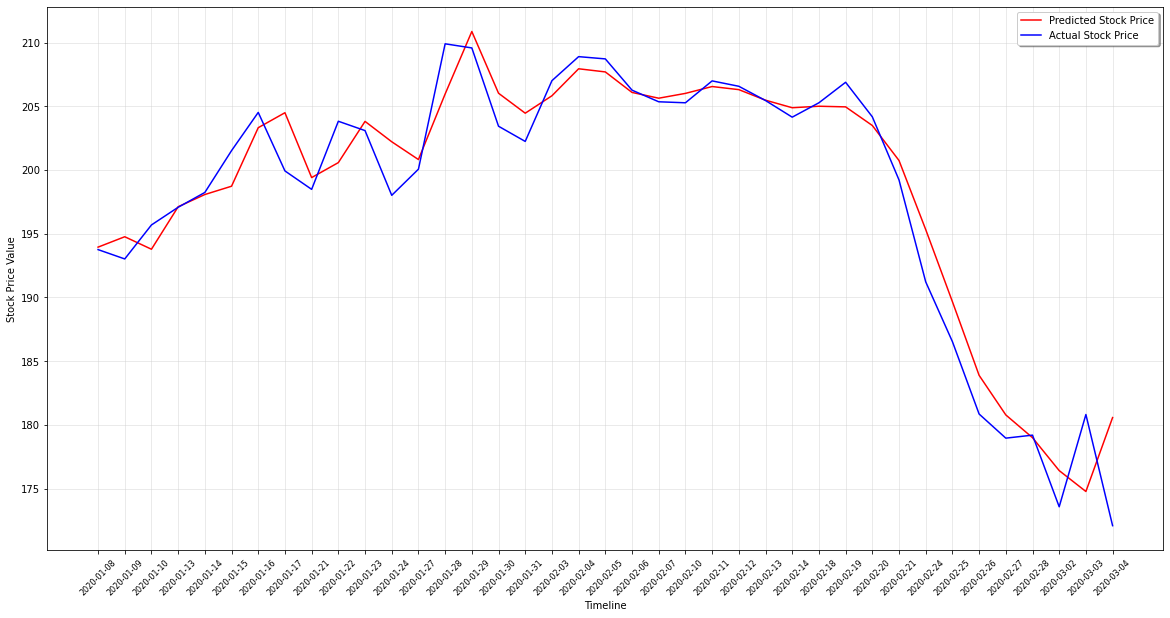

r2Score: 0.9992720250272236
adj_r2Score: 0.9992687841814906
rmse: 1.2900149737063442
mape: 0.014337990938977838


'GL'

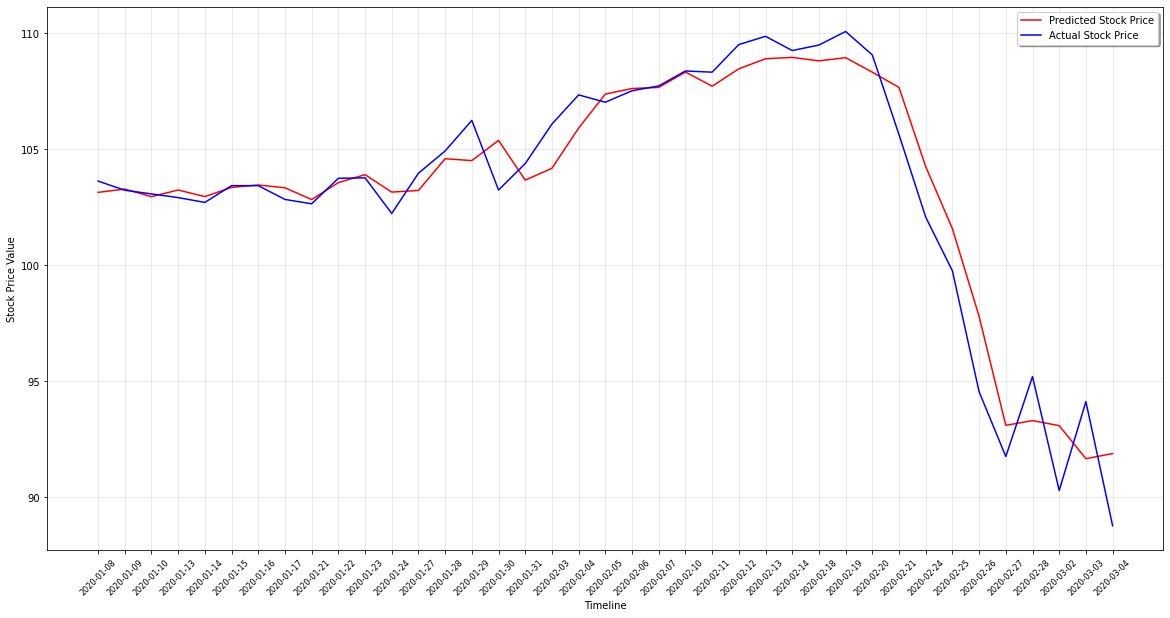

r2Score: 0.9995424075504948
adj_r2Score: 0.9995403704110424
rmse: 0.5444912611571399
mape: 0.012147817490868563


'PEP'

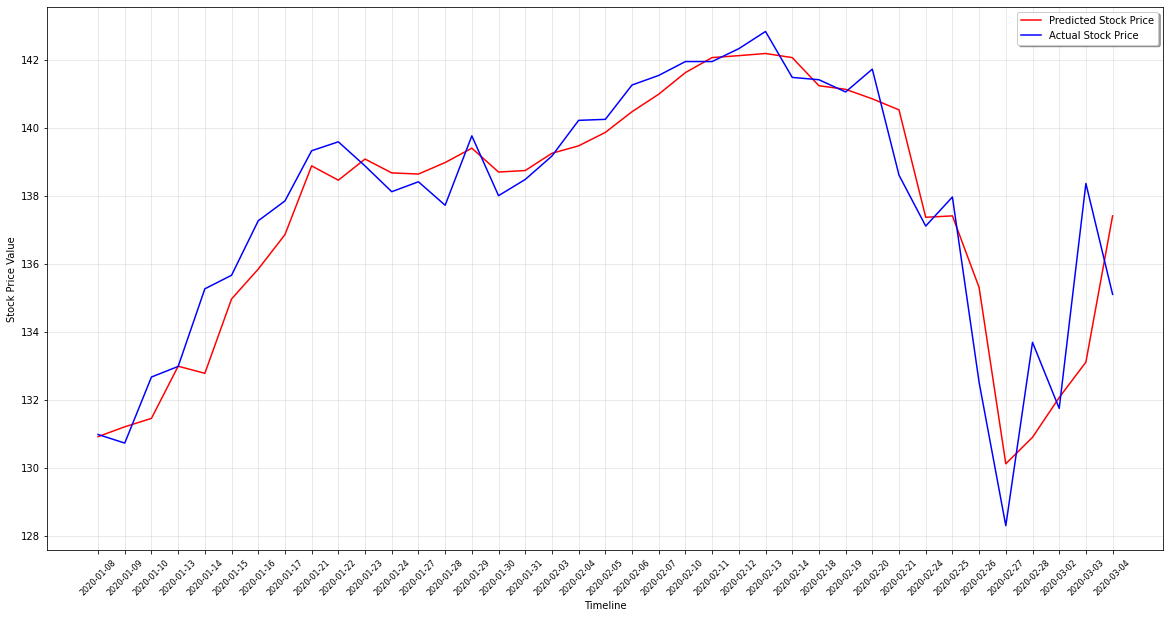

r2Score: 0.9996890038294864
adj_r2Score: 0.999687619316763
rmse: 0.631925730918463
mape: 0.011397653725118221


'BDX'

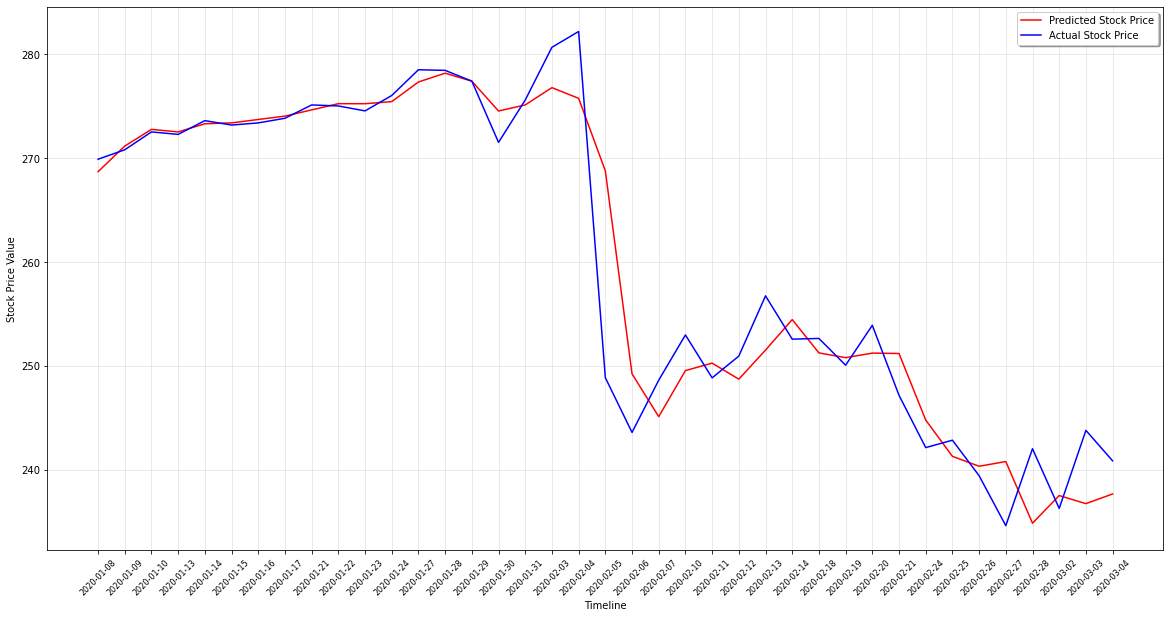

r2Score: 0.9995439785395891
adj_r2Score: 0.9995419483939668
rmse: 1.5075996130337848
mape: 0.011603678836419417


'IBM'

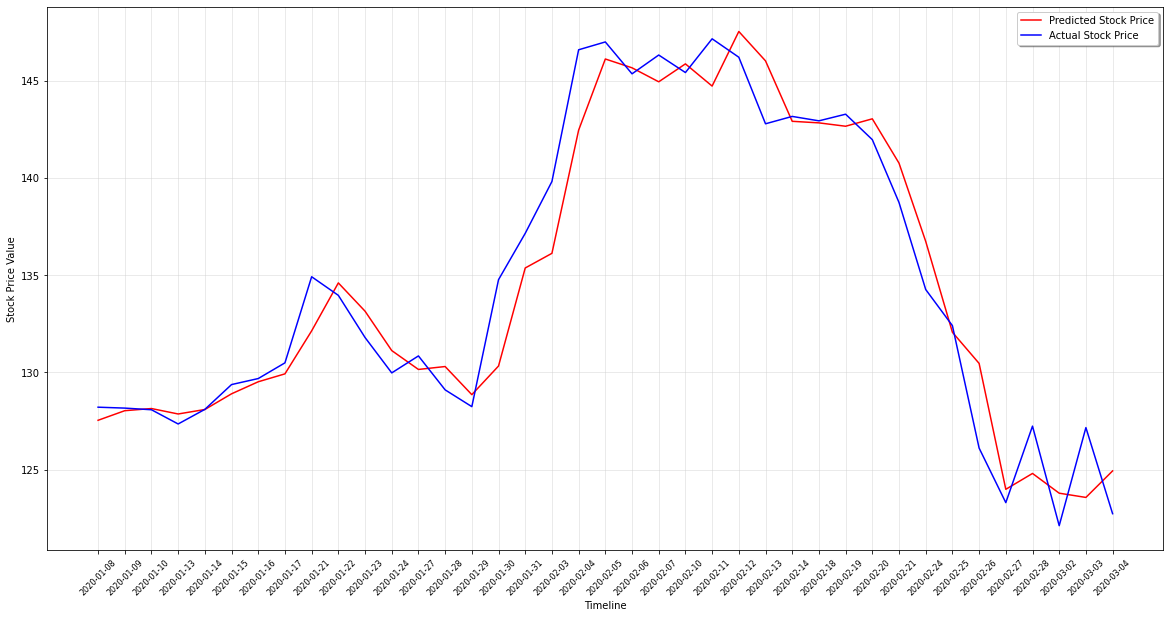

r2Score: 0.9993801098568051
adj_r2Score: 0.9993773501900575
rmse: 1.174153638213189
mape: 0.01245181655214462


In [20]:
Params = {'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_samples_leaf': 3, 'n_estimators': 150, 'oob_score': True}

clf = RandomForestRegressor(max_features= Params['max_features'], max_leaf_nodes= Params['max_leaf_nodes'], max_samples= Params['max_samples'], min_samples_leaf= Params['min_samples_leaf'], n_estimators=Params['n_estimators'], oob_score= Params['oob_score'])
codeM.allStock(data_scaler, clf, 8)